## Load Text Files

In [19]:
text_file = open('tale-of-two-cities.txt','r')
print(text_file)

<_io.TextIOWrapper name='tale-of-two-cities.txt' mode='r' encoding='cp1252'>


In [20]:
###Read the first line until hits a EOF (End of File) Marker
text_file.readline()

'  IT WAS the best of times, it was the worst of times, it was the\n'

In [21]:
text_file.readline(5)

'age o'

In [5]:
#In-Class Question: Assume you just opened the text file with open(). What output is returned when text_file.readline(5) is called the second time?

#A) The entire first line of the novel
#B) The first 5 characters of the second line
#C) The entire second line of the novel
#D) The first 5 characters of the first line
#E) The 6th-10th characters of the first line

## The answer is E, corrct?

In [22]:
#Reset the starting position of the streaming
text_file.seek(0)

for i in range(10):
    print(f'Interation {i +1 }: {text_file.readline(5)}')

Interation 1:   IT 
Interation 2: WAS t
Interation 3: he be
Interation 4: st of
Interation 5:  time
Interation 6: s, it
Interation 7:  was 
Interation 8: the w
Interation 9: orst 
Interation 10: of ti


## Explore the length of the file

In [23]:
#Read all lines
text_file.seek(0)

lines = text_file.readlines()

In [24]:
#This will return a list
print(f'there are {len(lines)} lines in the file')

there are 12870 lines in the file


In [25]:
#Word Count
total = 0
for line in lines:
    total += len(line)
avg = round(total/len(lines),1)
print(f'on average, there are {avg} characters in one line')

on average, there are 58.9 characters in one line


## Viz of Summary Stats

In [10]:
import matplotlib.pyplot as plt

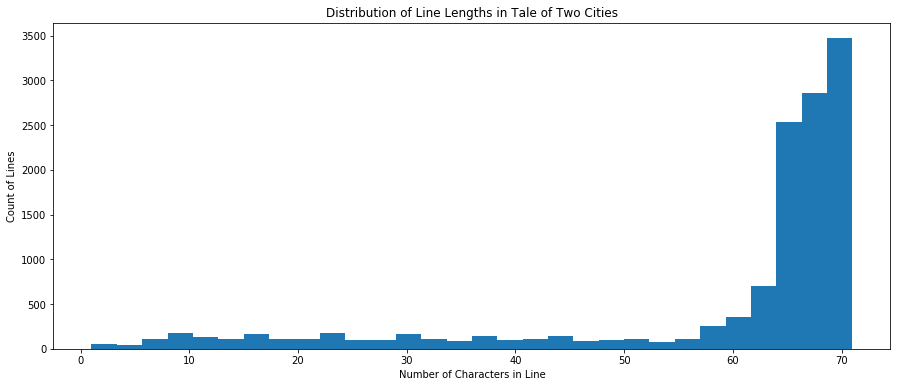

In [11]:
NUM_BINS = 30
plt.rcParams["figure.figsize"] = (15,6)
plt.hist([len(line) for line in lines], bins=NUM_BINS)
plt.title("Distribution of Line Lengths in Tale of Two Cities") # give the plot a title
plt.xlabel("Number of Characters in Line") # label the X axis
plt.ylabel("Count of Lines") # label the Y axis
plt.show()

## Count the occurrance of each word

In [12]:
# Method 1 Create a dictionary of words and count
words = []
word_count = {}

for line in lines:
    for word in line.split(' '):
        words.append(word)
        
        if word not in word_count.keys():
            word_count[word] = 1
        else:
            word_count[word] +=1

print(f'there are {len(words)} words in the novel')
print(f'there are {len(word_count.keys())} unique words in the novel')


there are 143345 words in the novel
there are 21683 unique words in the novel


In [13]:
# how to return unique elements of the list words
print(f'there are {len(set(words))} unique words in the novel')

there are 21683 unique words in the novel


In [20]:
"""
How to use assert statement to check uique words:
assert <condition>,<error message>
"""
assert len(word_count.keys()) == len(set(words)),'This error message will be printed if the assertion to the left is not true.'

In [21]:
test = ['I','am','just','a','test','list']

In [23]:
assert len(word_count.keys()) == len(set(test)),'Error, not equal'

AssertionError: Error, not equal

In [26]:
# Method 2 use Python built in counter
# Tutorial here https://pymotw.com/2/collections/counter.html
from collections import Counter
def count_words(lines, delimiter=" "):
    words = Counter()
    
    for line in lines:
        for word in line.split(delimiter):
            words[word] += 1
    
    return words    

In [28]:
count_words(lines)

Counter({'': 7027,
         'IT': 3,
         'WAS': 4,
         'the': 6634,
         'best': 32,
         'of': 3623,
         'times,': 17,
         'it': 1104,
         'was': 1558,
         'worst': 13,
         'the\n': 729,
         'age': 5,
         'wisdom,': 2,
         'foolishness,': 1,
         'epoch': 2,
         'of\n': 321,
         'belief,': 2,
         'incredulity,': 1,
         'season': 5,
         'Light,\n': 1,
         'Darkness,': 1,
         'spring': 3,
         'hope,': 5,
         'winter': 8,
         'despair,': 2,
         'we': 102,
         'had': 1177,
         'everything': 16,
         'before': 170,
         'us,': 29,
         'nothing\n': 9,
         'were': 577,
         'all': 410,
         'going': 71,
         'direct': 5,
         'to': 3145,
         'Heaven,': 10,
         'going\n': 3,
         'other': 128,
         'way-': 8,
         'in': 2212,
         'short,': 15,
         'period': 2,
         'so': 374,
         'far': 65,
   

## Build Functions to Plot Histgram

In [24]:
def histgram(values, x_size = 15, y_size =6, title = None, xlab = None, ylab = None, NUM_BINS = 30):
    plt.rcParams["figure.figsize"] = (x_size,y_size)
    plt.hist(values, bins=NUM_BINS)
    
    if title:
        plt.title(title)
    if xlab:
        plt.xlabel(xlab)
    if ylab:
        plt.ylabel(ylab) 
        
    plt.show()
    

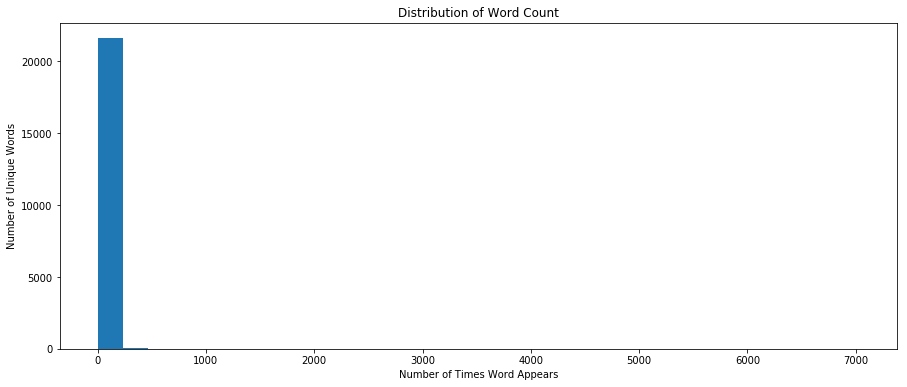

In [26]:
histgram(word_count.values(), 
               title="Distribution of Word Count",
               xlab="Number of Times Word Appears",
               ylab="Number of Unique Words")

 ## Exercise

You are a business analyst working for a major US toy retailer:

A manager in the marketing department wants to find out the most frequently used words in positive reviews (five stars) and negative reviews (one star) in order to determine who the toys are being bought for (sons, significant others, grandchildren, siblings, self, etc.). **He would like your opinion on which customer segments' (son, daughter, granddaugher, grandson, niece, nephew, sibling, significant other, etc.) marketing messaging tends to outperform other segments.**

One of your product managers suspects that **toys with batteries tend to be significantly lower rated than toys that do not require batteries.** She would like to see some data points confirming or rejecting her hypothesis.

Perform the same word count analysis using the reviews received from Amazon to answer your marketing manager's question. They are stored in two files, (poor_amazon_toy_reviews.txt) and (good-amazon-toy-reviews.txt). Provide a few sentences with your findings and business recommendations. Make any assumptions you'd like to- this is a fictitious company after all. I just want you to get into the habit of "finishing" your analysis: to avoid delivering technical numbers to a non-technical manager.

### Good Reviews

In [11]:
good = open("good_amazon_toy_reviews.txt","r",encoding="utf-8")
bad = open("poor_amazon_toy_reviews.txt","r",encoding="utf-8")

In [12]:
good.seek(0)
good_reviews = good.readlines()

In [13]:
bad.seek(0)
bad_reviews = bad.readlines()

In [38]:
def word_count(lines, delimiter = " "):
    words = Counter()
    
    for line in lines:
        line = line.lower()
        for word in line.split(delimiter):
            words[word]+=1
            
    return words

In [40]:
good_count = word_count(good_reviews)

In [41]:
persons = ['son','daughter','granddaughter','grandson','niece','nephew','sibling','self']

In [61]:
### Create keys for son and sons
persons_count = {}

for person in persons:
    persons_count[person] = good_count[person] + good_count[person +"s"]

In [62]:
persons_count

{'son': 6224,
 'daughter': 6381,
 'granddaughter': 2418,
 'grandson': 3485,
 'niece': 995,
 'nephew': 1139,
 'sibling': 58,
 'self': 107}

In [63]:
### Include Sister and Brother into Siblings
persons_count['sibling'] += good_count['sister']+good_count['sisters']+good_count['brother']+good_count['brothers']

In [64]:
persons_count

{'son': 6224,
 'daughter': 6381,
 'granddaughter': 2418,
 'grandson': 3485,
 'niece': 995,
 'nephew': 1139,
 'sibling': 848,
 'self': 107}

In [50]:
### Check if correct
sibling = good_count['sibling']
siblings  = good_count['siblings']
brother = good_count['brother']
brothers = good_count['brothers']
sister = good_count['sister']
sisters = good_count['sisters']

print(f'The total count for sibling is {sibling+siblings+brother+brothers+sister+sisters}')

son = good_count['son']
sons = good_count['son'+'s']

print(f'the totol count for son is {son+ sons}')

The total count for sibling is 848
the totol count for son is 6224


In [71]:
### sort the list
import operator
sort_persons_count = sorted(persons_count.items(), key=operator.itemgetter(1), reverse = True)

In [72]:
# seperate customer list and their corresponding counts 
customers = [i[0] for i in sort_persons_count]
customer_value = [i[1] for i in sort_persons_count]

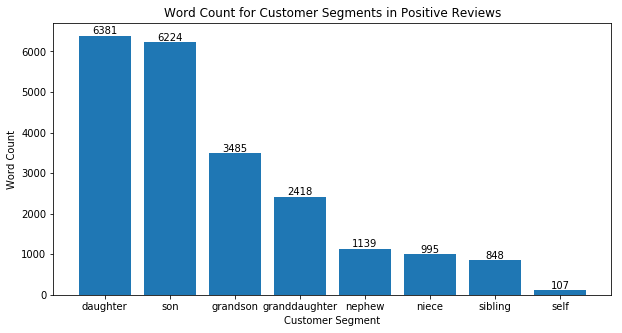

In [88]:
### Plot the finall result
import numpy as np
import matplotlib.pyplot as plt
x_labels = np.arange(len(customers))
plt.figure(figsize = (10,5))
plt.bar(x_labels, customer_value)
plt.xticks(x_labels, customers)
plt.xlabel("Customer Segment")
plt.ylabel("Word Count")
plt.title("Word Count for Customer Segments in Positive Reviews")
for a,b in zip(x_labels, customer_value):
    plt.text(a, b, str(b), horizontalalignment='center', verticalalignment='bottom')
plt.show()

### Bad Reviews

In [89]:
bad_count = word_count(bad_reviews)

In [90]:
persons_count = {}
for person in persons:
    persons_count[person] = bad_count[person] + bad_count[person +"s"]
persons_count['sibling'] += bad_count['sister']+bad_count['sisters']+bad_count['brother']+bad_count['brothers']

In [91]:
sort_persons_count = sorted(persons_count.items(), key=operator.itemgetter(1), reverse = True)

In [92]:
customers = [i[0] for i in sort_persons_count]
customer_value = [i[1] for i in sort_persons_count]

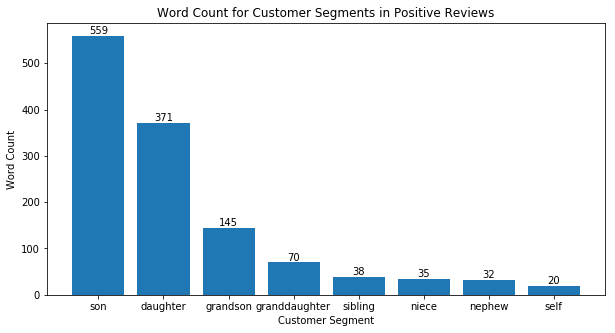

In [93]:
import numpy as np
import matplotlib.pyplot as plt
x_labels = np.arange(len(customers))
plt.figure(figsize = (10,5))
plt.bar(x_labels, customer_value)
plt.xticks(x_labels, customers)
plt.xlabel("Customer Segment")
plt.ylabel("Word Count")
plt.title("Word Count for Customer Segments in Positive Reviews")
for a,b in zip(x_labels, customer_value):
    plt.text(a, b, str(b), horizontalalignment='center', verticalalignment='bottom')
plt.show()

### Battery

In [95]:
## Count # of battery in good/ bad reviews
good_battery_count = good_count['battery'] + good_count['batteries']
bad_battery_count = bad_count['battery'] + bad_count['batteries']

In [96]:
## Count total number of good and bad reviews
num_good = len(good_reviews)
num_bad = len(bad_reviews)

In [98]:
## For the rest of records, assume a certain percentage of battery
battery_per = np.linspace(0, 0.999, 100)
print(battery_per)

[0.         0.01009091 0.02018182 0.03027273 0.04036364 0.05045455
 0.06054545 0.07063636 0.08072727 0.09081818 0.10090909 0.111
 0.12109091 0.13118182 0.14127273 0.15136364 0.16145455 0.17154545
 0.18163636 0.19172727 0.20181818 0.21190909 0.222      0.23209091
 0.24218182 0.25227273 0.26236364 0.27245455 0.28254545 0.29263636
 0.30272727 0.31281818 0.32290909 0.333      0.34309091 0.35318182
 0.36327273 0.37336364 0.38345455 0.39354545 0.40363636 0.41372727
 0.42381818 0.43390909 0.444      0.45409091 0.46418182 0.47427273
 0.48436364 0.49445455 0.50454545 0.51463636 0.52472727 0.53481818
 0.54490909 0.555      0.56509091 0.57518182 0.58527273 0.59536364
 0.60545455 0.61554545 0.62563636 0.63572727 0.64581818 0.65590909
 0.666      0.67609091 0.68618182 0.69627273 0.70636364 0.71645455
 0.72654545 0.73663636 0.74672727 0.75681818 0.76690909 0.777
 0.78709091 0.79718182 0.80727273 0.81736364 0.82745455 0.83754545
 0.84763636 0.85772727 0.86781818 0.87790909 0.888      0.89809091
 0.90

In [99]:
total_good_battery = good_battery_count + battery_per * (num_good - good_battery_count)
total_bad_battery = bad_battery_count + battery_per * (num_bad - bad_battery_count)

In [100]:
total_good_nobattery = num_good -total_good_battery
total_bad_nobattery = num_bad - total_bad_battery

In [102]:
## Calculate average stars
battery_avg = (5*total_good_battery + 1*total_bad_battery)/(total_bad_battery+total_good_battery)
nobattery_avg = (5*total_good_nobattery + 1*total_bad_nobattery)/(total_bad_nobattery+total_good_nobattery)

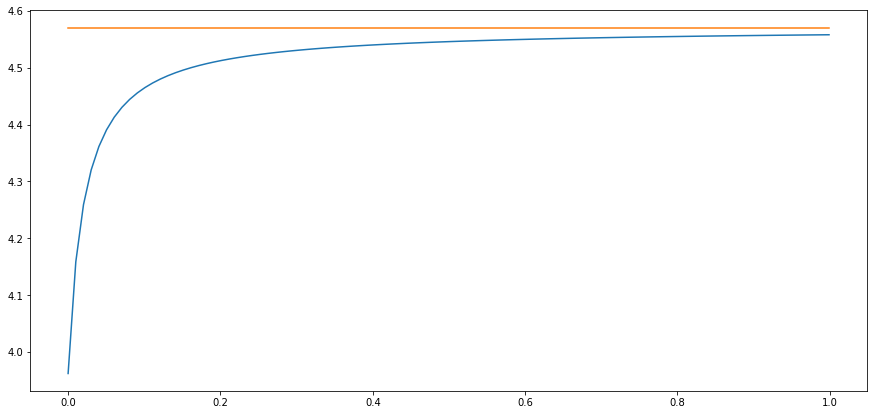

In [103]:
plt.figure(figsize=(15,7))
plt.plot(battery_per, battery_avg, label = "average review star for toys with battery")
plt.plot(battery_per, nobattery_avg, label = "average review star for toys without battery")